<a href="https://colab.research.google.com/github/sharannps/ml-heart-attack-study/blob/main/Comparative_Study_Heart__Attacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Contents

### 0. Overview of Dataset

- age - Age in years  
- sex - Sex (1 = male; 0 = female)  
- cp - Chest pain type:  
     - 0 = asymptomatic  
     - 1 = typical angina  
     - 2 = atypical angina  
     - 3 = non-anginal pain  
- trestbps - Resting blood pressure (in mm Hg on admission to the hospital)  
- chol - Serum cholesterol in mg/dl  
- fbs - Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)  
- restecg - Resting electrocardiographic results:  
    - 0 = left ventricular hypertrophy  
    - 1 = normal  
    - 2 = ST-T wave abnormality  
- thalach - Maximum heart rate achieved  
- exang - Exercise-induced angina (1 = yes; 0 = no)  
- oldpeak - ST depression induced by exercise relative to rest (in mm)
- slope - Slope of the peak exercise ST segment:  
    - 0 = downsloping  
    - 1 = flat  
    - 2 = upsloping  
- ca - Number of major vessels (0–3) colored by fluoroscopy  
- thal - Thalassemia:  
    - 1 = fixed defect  
    - 2 = normal  
    - 3 = reversible defect  
- target:  
    - 0 = less chance of heart attack
    - 1= more chance of heart attack


### 1. Importing Basic Libraries & Loading the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 1.1. Loading the Dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/heart.csv')

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### 1.2. Initial Analysis

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
new_columns = ["age", "sex", "cp", "trtbps", "chol", "fbs", "rest_ecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

In [7]:
df.columns = new_columns #correcting trestbps and rest_ecg column names

In [8]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.shape

(303, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


- The dataset contains 303 rows and 14 columns, i.e., 303 records and 14 features.
- All these features are numerical of dtype float64 or int64.

### 2. Preparing the Dataset for Exploratory Data Analysis

#### 2.1. Checking for Missing Values

In [11]:
isnull_number = []
for i in df.columns:
  x = df[i].isnull().sum()
  isnull_number.append(x)

pd.DataFrame(isnull_number, index=df.columns, columns=["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


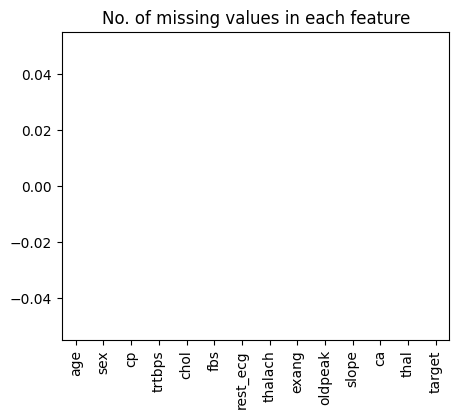

In [12]:
plt.figure(figsize=(5, 4))
df.isnull().sum().plot(kind='bar')
plt.title('No. of missing values in each feature')
plt.show()

- There are no missing values in the dataset.

#### 2.2. Checking for Distinct Values

In [13]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df["cp"].value_counts()

,count
cp,
0,143
2,87
1,50
3,23


In [15]:
df["cp"].value_counts().count()

np.int64(4)

- There are 4 distinct values in the ca column. This implies that it is a categorical feature.

In [16]:
distinct_vals = []
for i in df.columns:
  x = df[i].value_counts().count()
  distinct_vals.append(x)

pd.DataFrame(distinct_vals, index=df.columns, columns=["No. of distinct Values"])

,No. of distinct Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


- Variables with fewer distinct values are likely to be categorical, while those with many distinct values are likely to be numerical.
- Numerical variables: age, trtbps, chol, thalach, and oldpeak
- Categorical variables: sex, cp, fbs, rest_ecg, exang, slope, ca, thal, target

In [17]:
numerical_vars = ["age", "trtbps", "chol", "thalach", "oldpeak"]
categorical_vars = ["sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"]

### 3. Exploratory Data Analysis

#### 3.1 Univariate Analysis

##### 3.1.1 Numerical Variables

In [18]:
df[numerical_vars].describe()

,age,trtbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [19]:
numerical_vars

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [20]:
numerical_axis_names = ["Age", "Resting Blood Pressure", "Cholesterol", "Maximum Heart Rate Achieved", "ST Depression"]

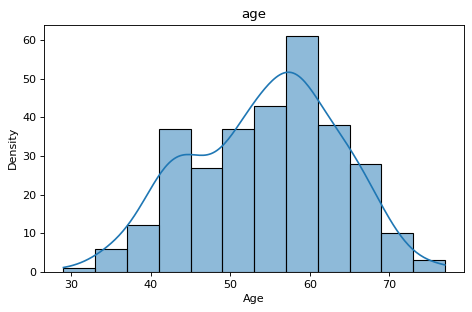

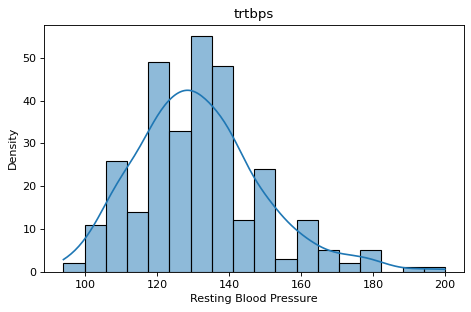

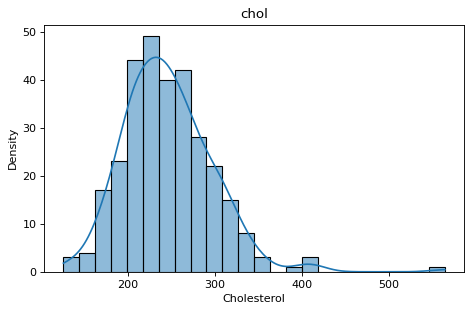

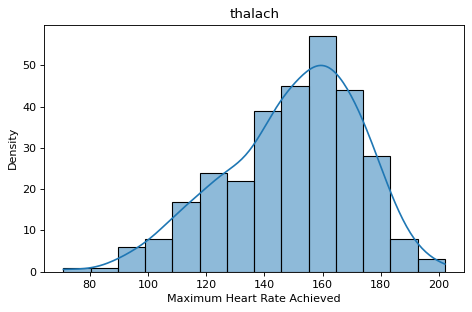

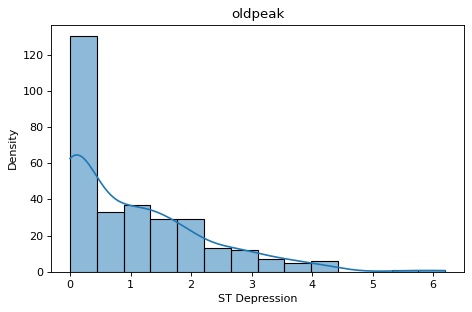

In [21]:
for i, j in list(zip(numerical_vars, numerical_axis_names)):
  plt.figure(figsize=(6,4), dpi=80)
  sns.histplot(df[i], kde=True, linewidth=1, edgecolor="k")

  plt.title(i)
  plt.xlabel(j)
  plt.ylabel("Density")

  plt.tight_layout()
  plt.show()

##### Insights:

age

- Min: 29
- Max: 77
- Mean: 54.36
- SD: 9.08

- The distribution appears to be roughly normal, but with slight negative skewness (skewed to the left).
- This means that there are relatively fewer young individuals and more concentration in the older age ranges.
- The highest frequency occurs around 55-60 years.
- Looks like there no outliers in this column.

trtbps

- Min: 94
- Max: 200
- Mean: 131.62
- SD: 17.54
- The distribution is positively skewed (skewed to the right). Most of the individuals have a blood pressure toward the lower end of the range.
- The highest frequency occurs around 120-140 mmHg with counts reaching over 50 individuals.
- Values after 180 mmHg can be considered to be outliers.

chol

- Min: 126
- Max: 564
- Mean: 246.26
- SD: 51.83
- The distribution is positively skewed. Most cholesterol levels are in a lower end of the range.
- The highest frequency occurs around the 200-250 mg/dl range.
- Values after 380 mmHg can be considered to be outliers.

thalach
- Min: 71
- Max: 202
- Mean: 149.65
- SD: 22.91
- The distribution is slightly negatively skewed.
- The highest frequency occurs around the 150-160 bpm range.
- Values before 80 bpm can be considered to be outliers.

oldpeak
- Min: 0
- Max: 6.20
- Mean: 1.04
- SD: 1.16
- The distribution is extremely right skewed.
- Majority of the individuals have 0 mm oldpeak value. Most values lie between 0-1.5 mm.
- Values after 2.5 can be considered as outliers.

##### 3.1.2 Categorical Variables

In [22]:
categorical_axis_names = ["Sex", "Chest Pain Type", "Fasting Blood Sugar", "Resting Electrocardiographic Results", "Exercise Induced Angina", "The Slope of ST Segment", "Number of Major Vessels Coloured by Flourosopy", "Thallium Stress Test", "Target"]

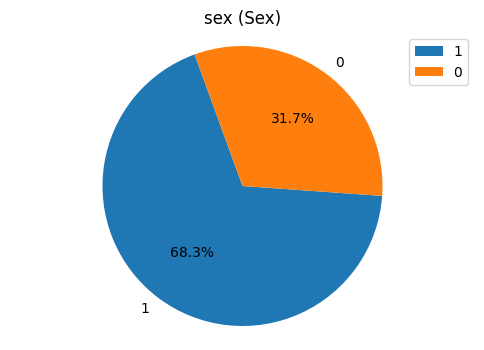

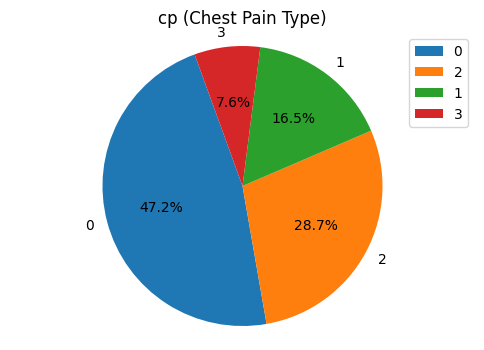

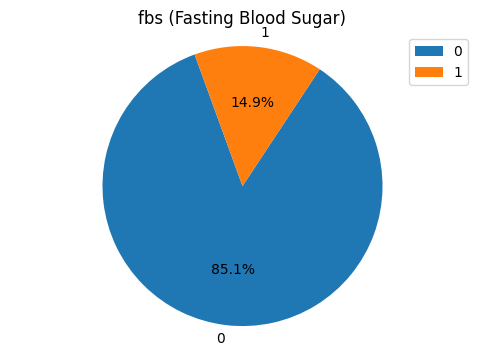

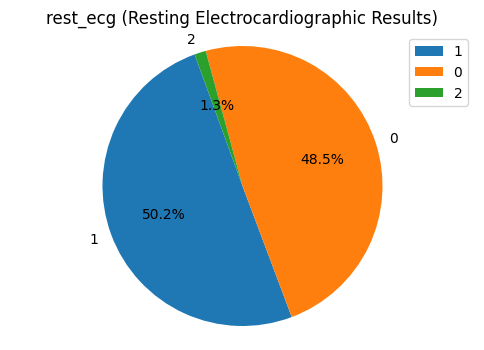

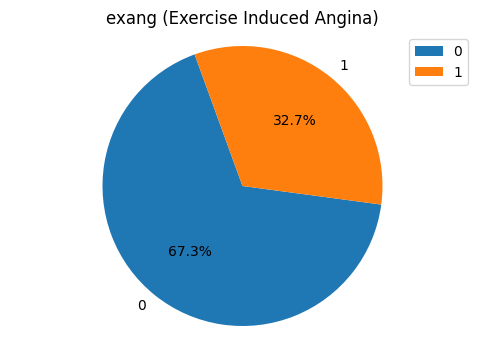

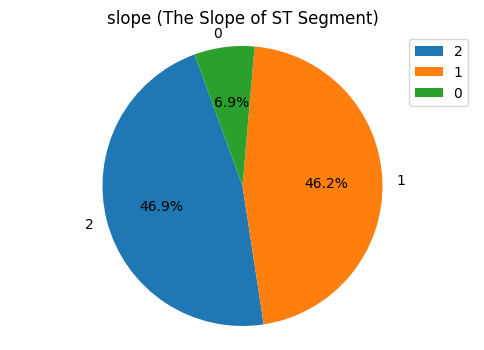

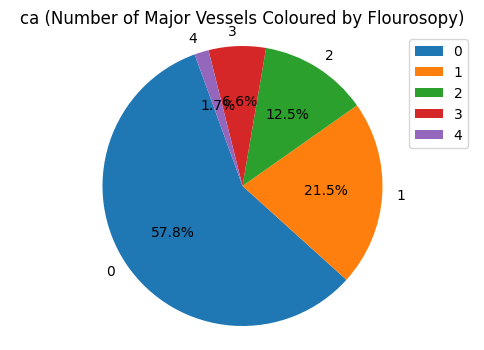

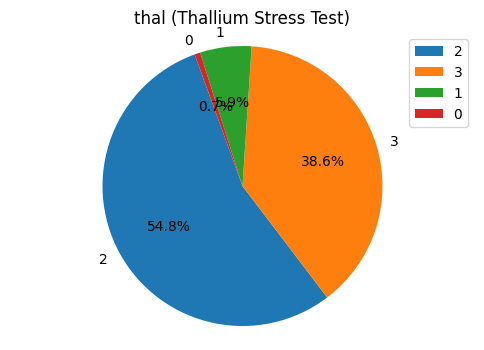

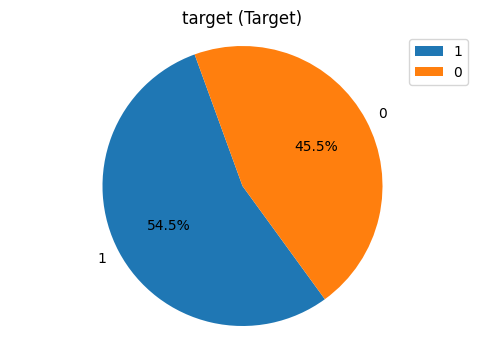

In [23]:
for i,j in list(zip(categorical_vars, categorical_axis_names)):
    fig, ax = plt.subplots(figsize = (6,4))

    observation_values = list(df[i].value_counts().index)
    total_observation_values = list(df[i].value_counts())

    ax.pie(total_observation_values, labels= observation_values, autopct = '%1.1f%%', startangle = 110, labeldistance = 1.1)
    ax.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.title((i + " (" + j + ")")) # Pie chart titles
    plt.legend()
    plt.show()

##### Insights:

sex
- 68.3% of our patients are male and 31.7% are female.
-	So, we can say that the number of female patients is roughly half that of male patients.


cp
- 47.2% of the patients have an observation value of 0, that is, they have asymptomatic angina.
- We can thus conclude that around half of the patients have asymptomatic angina, that is chest pain without any symptoms.
- 28.7% of the patients have an observation value of 2, that is, they have atypical angina. These patients have non-classical pain or shortness of breath.
- 16.5% of the patients have an observation value of 1, that is, they have typical angina. These patients have classic chest exertion pain which arises during any physical activity.
- The remaining 7.6% of the patients have an observation value of 3, that is they have non-anginal chest pain. This is chest pain that is not caused by heart disease or a heart attack.


fbs
-	85.1% of the patients have an observation value of 0, that is they have a fasting blood sugar level of less than 120 mg/dl.
-	The remaining 14.9% of the patients have a fasting blood sugar level more than 120 mg/dl.


rest_ecg
- Here, around 1.3% of the patients have an observation value of 2, indicating hypertrophy. This is negligible.
- 50.2% of the patients have an observation value of 1, that is the ECG results of these patients have ST-T wave abnormality.
- The remaining 48.5% of the patients' ECG results are normal.


exang
- 67.3% of the patients do not have exercise induced angina.
- The remaining 32.7% have exercise induced angina.
- More than half of the patients do not have exercise-induced angina.


slope
- 6.9% of the patients have a downward slope of the ST wavelength.
- The other two observation values are almost equal to each other.
- The ST wavelength of half of the remaining patients is 1, that is flat, while the observation value of the other half is 2, that is, the ST wavelength is sloped upwards.


ca
- In more than half of the patients, 57.8%, the number of large vessels coloured by fluoroscopy is 0.
- The number of large vessels coloured by fluoroscopy observed in 21.5% of the patients is 1.
- The number of large vessels coloured by fluoroscopy observed in 12.5% of the patients is 2.
- The number of large vessels coloured by fluoroscopy observed in 6.6% of the patients is 3.
- The number of large vessels coloured by fluoroscopy observed in 1.7% of the patients is 4.
- Therefore, the majority of the patients have occlusions in their veins, which prevents the visualisation of large vessels using fluoroscopy.


thal

- This is the result of the 'Thallium Stress Test'. It is simply an imaging method that evaluates the amount of blood reaching the heart muscle and determines whether a person has coronary artery disease or not.
- According to our research, the observation value of 0 is null. Therefore, 0 observation values will be returned to null and filled with logical data or removed.
- 54.8% of the patients have an observation value of 2. This means that the blood flow to the heart muscle appears to be normal both at rest and during stress.
- 38.6% of the patients have a value of 3; reversible defect. This suggests that there is reduced blood flow to a particular area of the heart during stress, but the blood flow returns to normal when the stress is relieved. It indicates that there may be a partial blockage or narrowing in one of the coronary arteries.
- 5.9% of patients have a value of 1; fixed defect. This indicates an area of the heart muscle that has decreased blood flow both at rest and during stress. It suggests a permanent blockage in one of the coronary arteries.

target

- More than half of the patients, 54.5%, have a heart attack risk. The remaining 45.5% have no heart attack risk.


##### Replacing 0 wil NaN in thal column

In [24]:
df[df["thal"] == 0]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [25]:
df["thal"] = df["thal"].replace(0, np.nan)

In [26]:
df.loc[[48, 281], :]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,NaN,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,NaN,0


In [27]:
df["thal"] = pd.to_numeric(df["thal"], downcast = "integer") #Converts 'thal' column to numeric (ideally integer), handling potential errors with NaN.

In [28]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


In [29]:
df["thal"].value_counts()

,count
thal,
2.0,166
3.0,117
1.0,18


#### 3.2 Bivariate Analysis

##### 3.2.1 Numerical Variables vs. Target (KDE plots & Correlation)

In [30]:
numerical_vars

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [31]:
numerical_vars.append("target")
numerical_vars

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

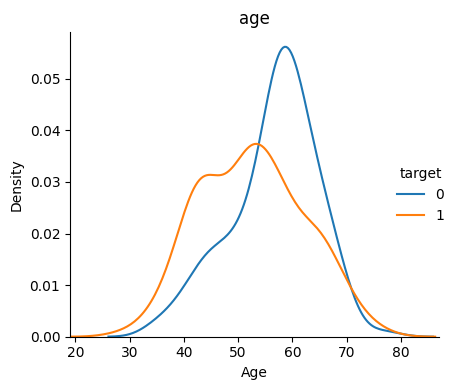

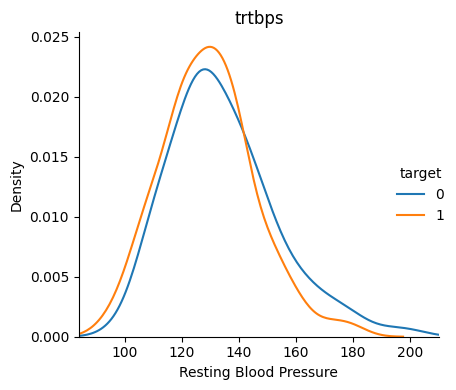

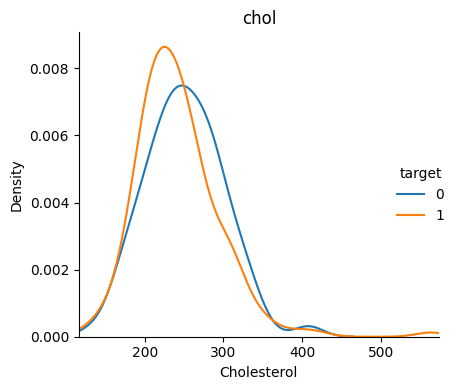

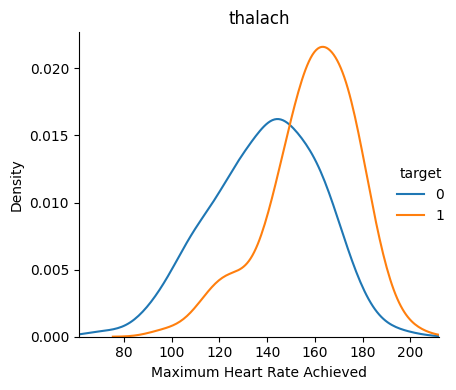

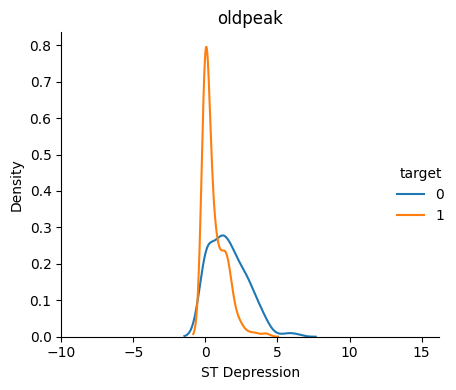

In [32]:
for i, j in list(zip(numerical_vars, numerical_axis_names)):
    graph = sns.FacetGrid(df[numerical_vars], hue = "target", height = 4, xlim = ((df[i].min() - 10), (df[i].max() + 10)))
    graph.map(sns.kdeplot, i)
    graph.add_legend()

    plt.title(i)
    plt.xlabel(j)
    plt.ylabel("Density")

    plt.tight_layout()
    plt.show()

In [33]:
df[numerical_vars].corr()['target'].drop('target')

,target
age,-0.225439
trtbps,-0.144931
chol,-0.085239
thalach,0.421741
oldpeak,-0.430696


For each of the numerical variables—age, trtbps, chol, thalach, and oldpeak—Kernel Density Estimate (KDE) plots were generated against the target variable. The correlation between each numerical variable and the target variable was also taken into account.

Insights:

age
-	The general notion is that the risk of heart attacks increases with age. However, we can infer from the kdeplot that, after the age of 55, there is a considerable increase in the blue graph (target variable 0) and a decrease in the orange graph (target variable 1).
-	We can also see that the correlation between the age and the target variable is -0.225439, i.e., there is a small negative correlation.

trtbps
-	The two graphs are almost similar; the graphs overlap too much.
-	So, it is not that easy to predict if someone will have a heart attack from their resting blood pressure.
-	-0.144931 is the correlation between the trtbps and the target variable which is a very small negative correlation.


chol
-	There is an increase in the probability of having a heart attack from 180 to 250 as we can see in the graph. After that it becomes difficult to see if there is any correlation as the graphs overlap a lot.
-	The correlation between the two variables is -0.085239. Again, very negligible negative correlation.


thalach
-	After a maximum heart rate achieved of 150, we can notice a considerable increase in the target variable 1. Thus, we can say that patients with a higher maximum heart rate achieved are at a higher risk of heart attacks.
-	We can also see a correlation of 0.421741, which is a very considerable positive correlation.


oldpeak
-	Here, there is a drastic increase in target variable 1 in the range 0 to 1.5, after which the graph drops significantly. So, this range is crucial for us.
-	When it comes to correlation however it is -0.430696 which is a considerable negative correlation. Thus, in general we can say that with increase in the oldpeak variable, the possibility of getting a heart attack decreases.


##### 3.2.2 Categorical Variables vs. Target (Count Plot)

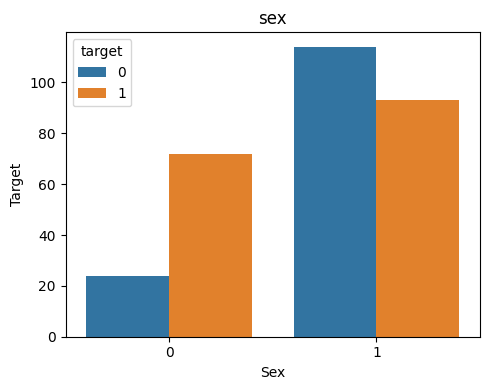

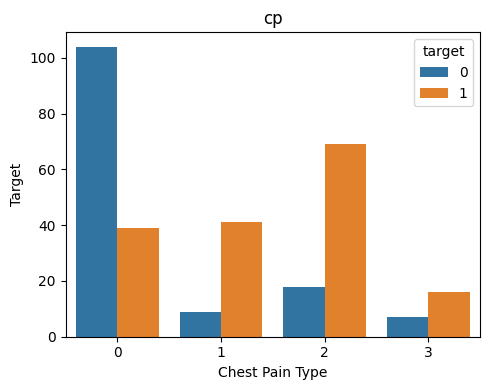

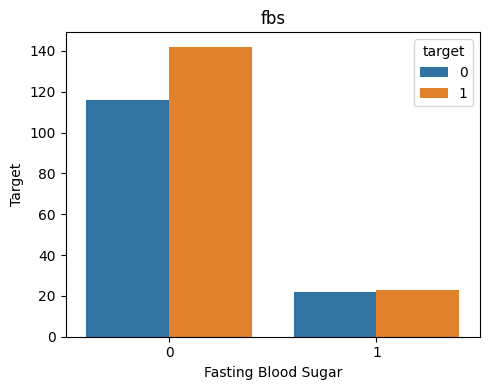

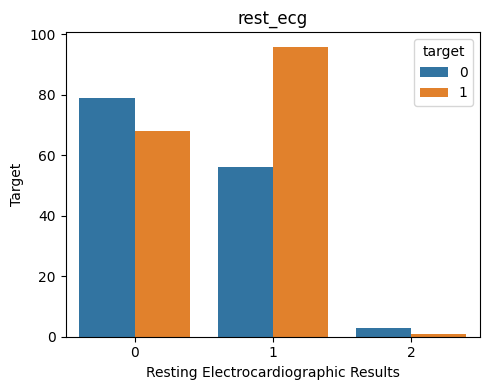

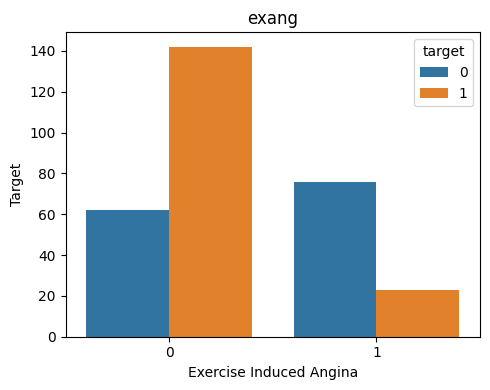

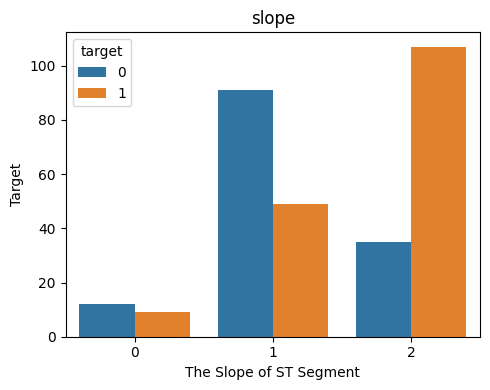

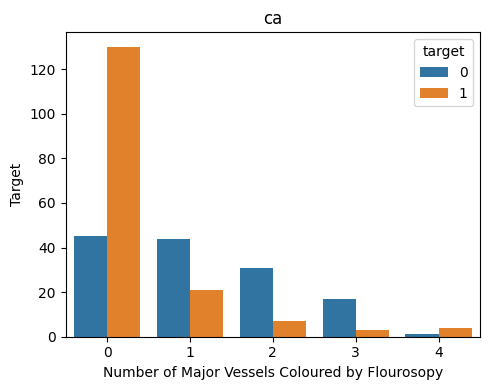

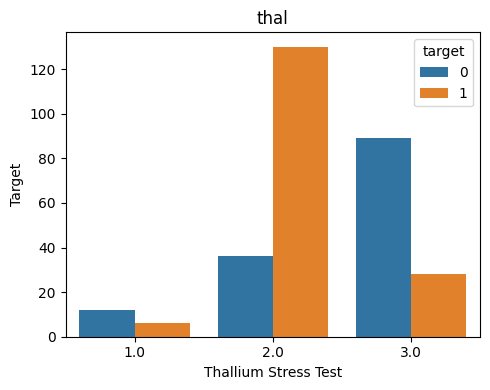

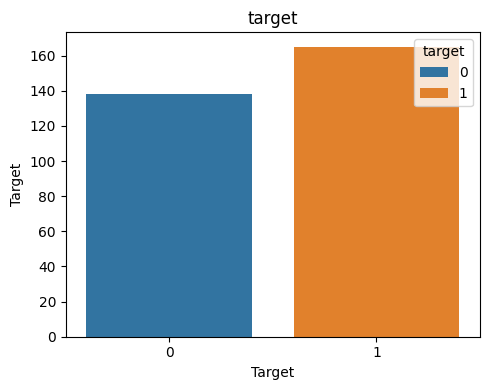

In [34]:
for i, j in list(zip(categorical_vars, categorical_axis_names)):
    plt.figure(figsize = (5,4))
    sns.countplot(x=i, data = df[categorical_vars], hue = "target")

    plt.title(i)
    plt.xlabel(j)
    plt.ylabel("Target")

    plt.tight_layout()
    plt.show()

In [35]:
df[categorical_vars].corr().iloc[:, [-1]].drop("target")

,target
sex,-0.280937
cp,0.433798
fbs,-0.028046
rest_ecg,0.137230
exang,-0.436757
slope,0.345877
ca,-0.391724
thal,-0.365264


For each of the categorical variables—sex, cp, fbs, rest_ecg, exang, slope, ca and thal—count plots were generated against the target variable. The correlation between each categorical variable and the target variable was also taken into account.

Insights:

sex
-	From the graph, we can see that among women, more than half of the patients have a higher chance of heart attack. In men, the blue-coloured bar has more observation values.
-	Thus, female patients are at higher risk for heart attack.
-	The correlation between sex and target is -0.280937 which is a small negative correlation.


cp
- Patients with asymptotic pain (0) are less likely to have a heart attack as seen in the graph.
-	In the other three observational values (1,2,3), i.e, typical angina, atypical angina or non-anginal pain, the risk of heart attack is higher.
-	The correlation between cp and target is 0.433798 which is a considerable positive correlation.


fbs
-	Patients with fasting blood sugar levels less than 120 mg/dl are at a higher risk of heart attack.
-	For those with fasting blood sugar levels greater than 120 mg/dl, the observations with target values 0 and 1 are almost equal.
-	The correlation between fbs and target is -0.028046 which is a negligible negative correlation.


rest_ecg
-	From the graph it is evident that patients having ST-T wave abnormality are at a higher risk of heart attack compared to those who don't or those who have hypertrophy.
-	The correlation between rest_ecg and target is 0.137230 which is a very small positive correlation.


exang
- If the patient's "exang" variable is 1, i.e., if the patient has exercise-related angina, the probability of not having a heart attack is higher.
- In contrast, patients who do not have exercise-related angina are more likely to have a heart attack.
- This doesn't make any sense logically, so we can conclude that exercise related to angina has nothing to do with the risk of getting a heart attack.
- The correlation between rest_ecg and target is -0.436757 which is a considerable negative correlation.

slope
- Patients with an upward slope of the peak exercise ST segment are at a higher risk of heart attack.
- While those with a downward slope or flat ST segment, the risk of heart attack is lower.
- The correlation between the two variables is 0.345877, which is a considerable positive correlation.

ca
- Patients whose blood vessels are not coloured by fluoroscopy have the highest risk of heart attack here.
- Those with observational values 1,2 and 3 it is the other way around.
- However, in those with observation value 4, there is a slight increase in the risk of having a heart attack.
- The correlation between the two variables is -0.391724, which is a considerable negative correlation.

thal
- The patients who have an observation value of 2, .i.e, the blood flow to the heart muscle appears to be normal both at rest and during stress and are at a higher risk of having a heart attack compared to those who have fixed (permanent blockage) or reversible (partial blockage) defects.
- The correlation between the two variables is -0.363322, which is a considerable negative correlation.

##### 3.2.3  Examining Numerical Variables Among Themselves

In [36]:
numerical_vars.remove("target")

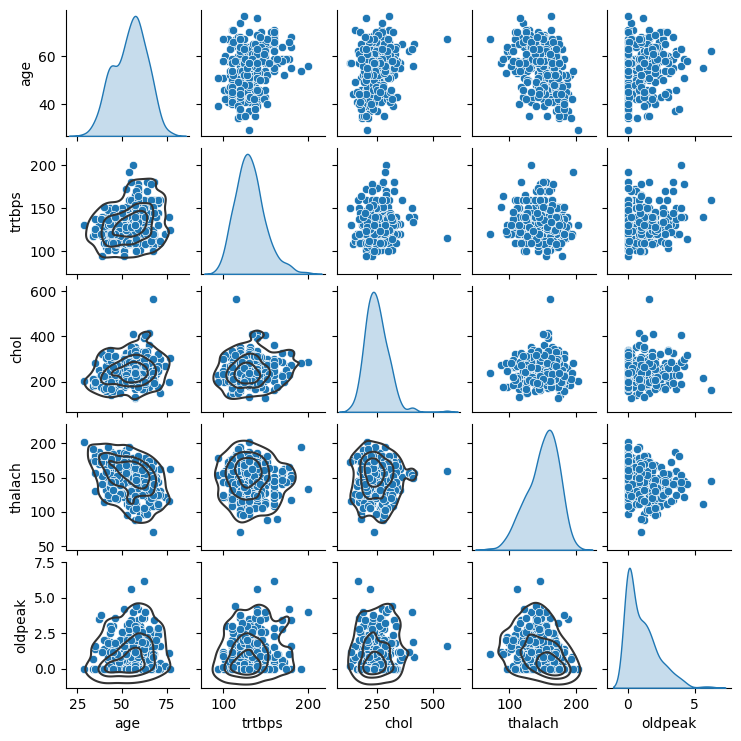

In [37]:
graph = sns.pairplot(df[numerical_vars], diag_kind = "kde", height=1.5)
graph.map_lower(sns.kdeplot, levels = 4, color = ".2")
plt.show()

Insights:

age
- From the pair plot, we can notice that the thalach variable has a considerable negative correlation with the age variable.


trtbps
- We can notice a slight positive correlation with the age variable.
- Rest of the variables seem to have little to no correlation with the trtbps variable.

chol
- We can see that there is a slight positive correlation with age (we can say that cholesterol increases with age) and trtbps.

thalach
- We can observe a considerable negative correlation with the age variable.

oldpeak
- The points are too scattered here. Little to no correlation with the other variables. However, the relationship with the other variables seems to be fairly similar.

##### 3.2.4 Numerical Variables vs. Categorical Variables (Swarm Plot)

First, we need to scale the features because swarm plots can get really messy when there are outliers or skewed distributions.

In [38]:
from sklearn.preprocessing import RobustScaler

In [39]:
robust_scaler = RobustScaler()

In [40]:
scaled_data = robust_scaler.fit_transform(df[numerical_vars])

In [41]:
scaled_data

array([[ 0.59259259,  0.75      , -0.11023622, -0.09230769,  0.9375    ],
       [-1.33333333,  0.        ,  0.15748031,  1.04615385,  1.6875    ],
       [-1.03703704,  0.        , -0.56692913,  0.58461538,  0.375     ],
       ...,
       [ 0.96296296,  0.7       , -0.74015748, -0.36923077,  1.625     ],
       [ 0.14814815,  0.        , -1.71653543, -1.16923077,  0.25      ],
       [ 0.14814815,  0.        , -0.06299213,  0.64615385, -0.5       ]])

In [42]:
df_scaled = pd.DataFrame(scaled_data, columns = numerical_vars)
df_scaled.head()

,age,trtbps,chol,thalach,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250


In [43]:
df_new = pd.concat([df_scaled, df.loc[:, "target"]], axis = 1) #new scaled dataframe with target

In [44]:
df_new.head()

,age,trtbps,chol,thalach,oldpeak,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,1


In [45]:
melted_data = pd.melt(df_new, id_vars = "target", var_name = "variables", value_name = "value") #melting refers to transforming a DataFrame from a wide format to a long format.

In [46]:
melted_data

,target,variables,value
0,1,age,0.592593
1,1,age,-1.333333
2,1,age,-1.037037
3,1,age,0.074074
4,1,age,0.148148
...,...,...,...
1510,0,oldpeak,-0.375000
1511,0,oldpeak,0.250000
1512,0,oldpeak,1.625000
1513,0,oldpeak,0.250000


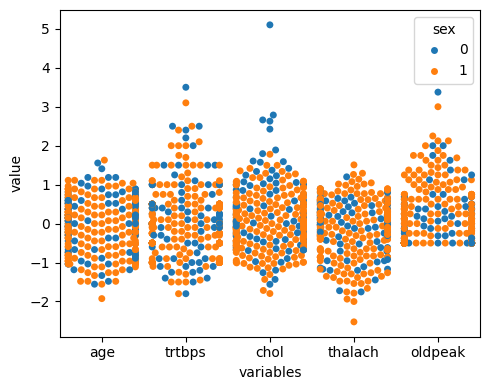

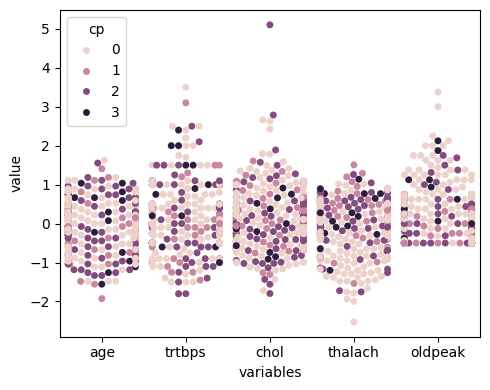

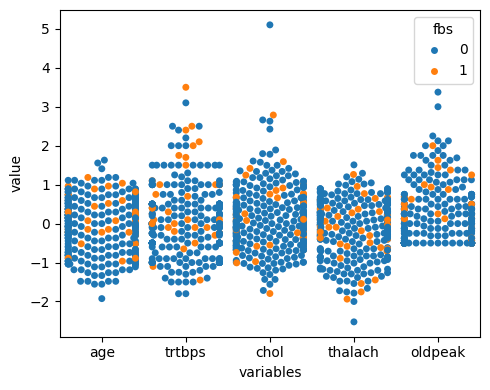

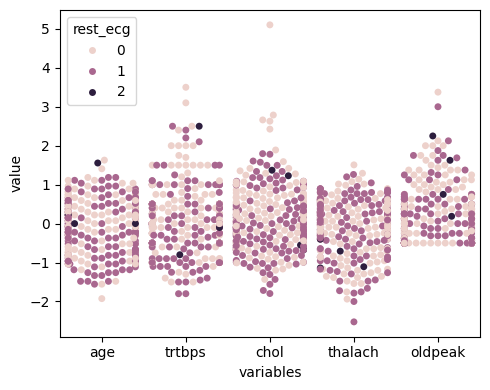

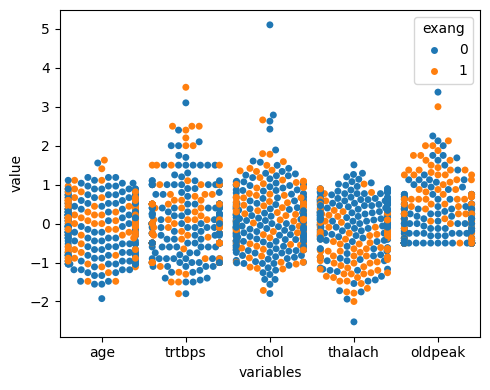

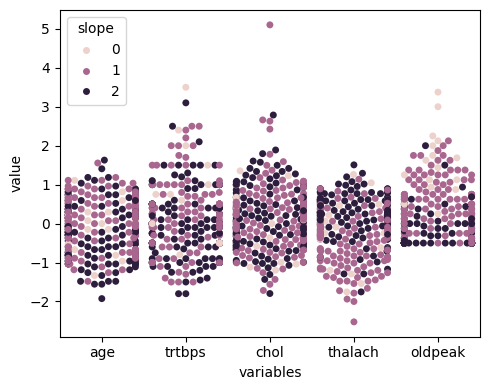

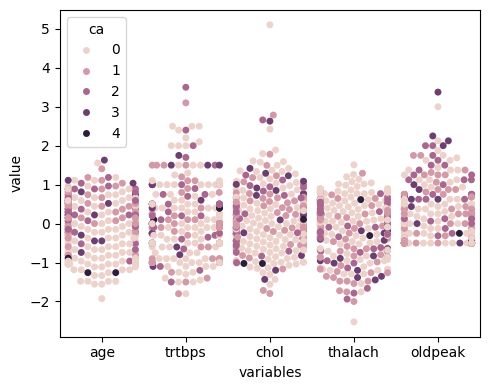

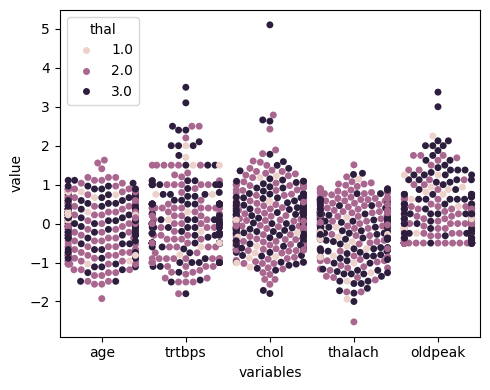

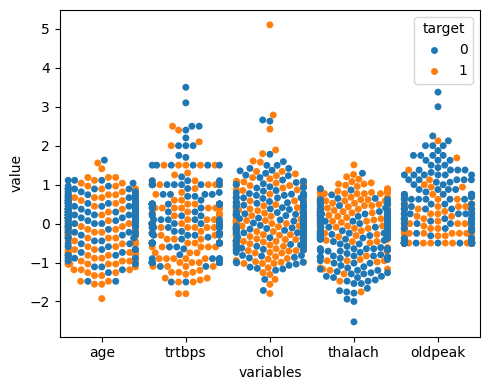

In [47]:
import warnings
warnings.filterwarnings("ignore")

for i in df[categorical_vars]:
    df_new = pd.concat([df_scaled, df.loc[:, i]], axis = 1)
    melted_data = pd.melt(df_new, id_vars = i, var_name = "variables", value_name = "value")

    plt.figure(figsize = (5,4))
    sns.swarmplot(x = "variables", y = "value", hue = i, data = melted_data)

    plt.xlabel("variables")
    plt.ylabel("value")

    plt.tight_layout()
    plt.show()

Insights:

sex
- The points are not distinguishable at all. Hence, sex has very weak relationships with the numeric variables.


cp
- Not much correlation here also.

fbs
- This plot is dominated by the observational value 0 for fbs.
- Hence, it is not possible to conclude that there exists some correlation between the variables.

rest_ecg
- Not much correlation here too.

exang
- The points are distinguishable in both the thalach and the oldpeak plots.
- In the thalach plot, there seems to be a considerable correlation as we can see a clear separation between the clusters of 0 and 1.
- Compared to thalach, there seems to be a weaker correlation between exang and oldpeak.
- Not much correlation with the rest of the numerical variables.

slope
- Again, it seems that there is a considerable correlation between thalach and oldpeak.
- In the plots of the rest of the numeric variables, the points are somewhat homogeneously distributed. Thus, there seems to be a low correlation.



ca
- There seems to be a considerable correlation with age, thalach and oldpeak.



thal
- Again, there seems to exist a considerable correlation between thalach and oldpeak.

target
- There seems to exist a very considerable correlation with thalach and oldpeak.
- There seems to exist a weak relationship with age as well.

#####	3.2.5 Numerical Variables vs. Categorical Variables (Box and Whisker Plots)

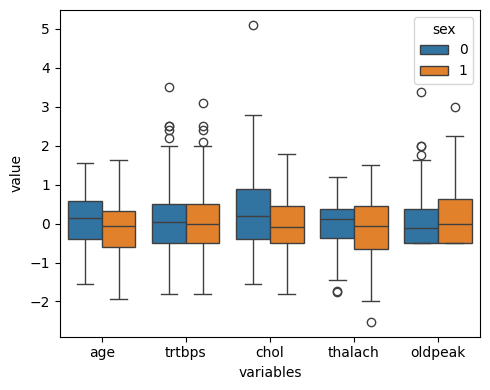

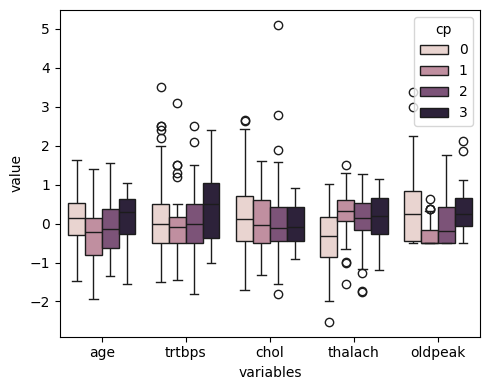

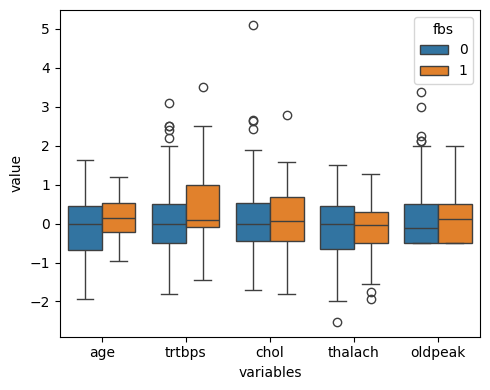

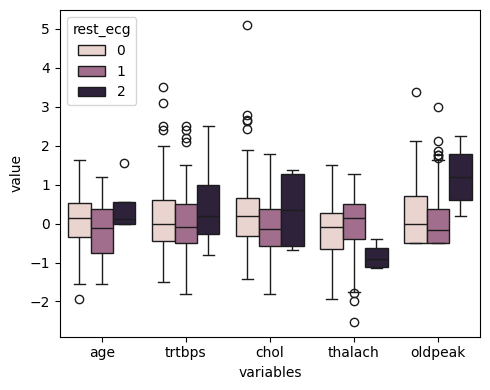

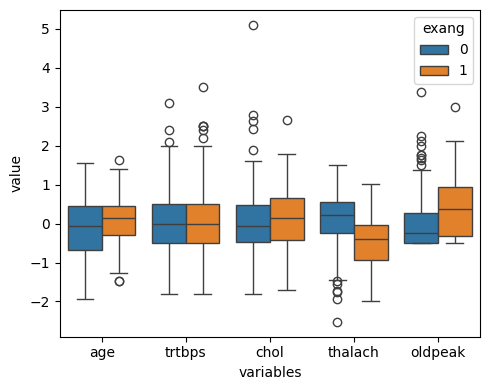

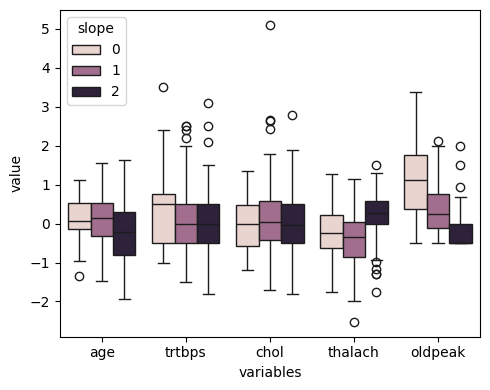

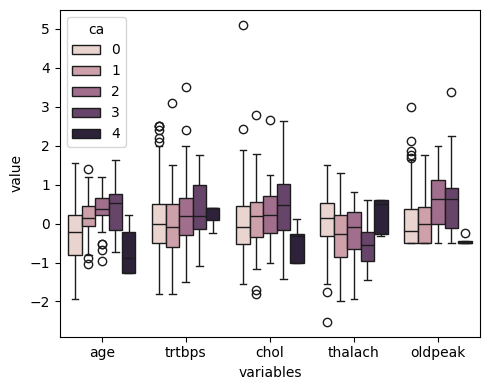

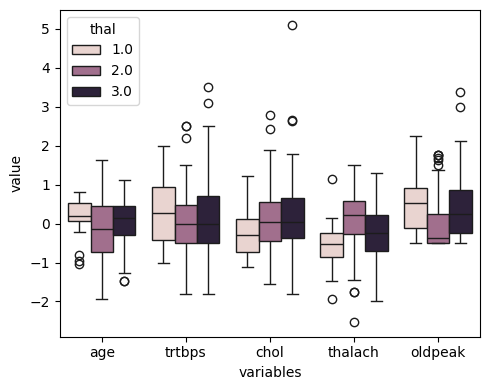

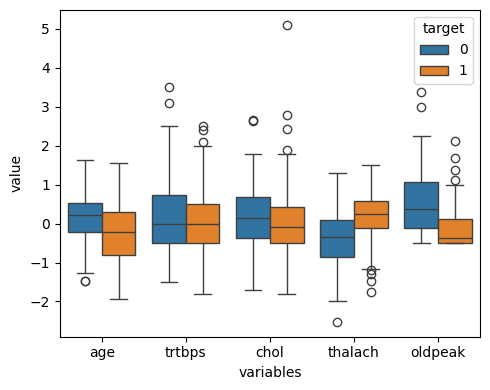

In [48]:
for i in df[categorical_vars]:
    df_new = pd.concat([df_scaled, df.loc[:, i]], axis = 1)
    melted_data = pd.melt(df_new, id_vars = i, var_name = "variables", value_name = "value")

    plt.figure(figsize = (5,4))
    sns.boxplot(x = "variables", y = "value", hue = i, data = melted_data)

    plt.xlabel("variables")
    plt.ylabel("value")

    plt.tight_layout()
    plt.show()

Insights:

sex
- sex has very weak relationships with the numeric variables since the boxes are very near to each other and not distinguishable.



cp
- There seems to be a relationship with the thalach variable since the median of the blue box is outside the other boxes.


fbs
- Weak relationships with all numeric variables.


rest_ecg
- The green box represents patients with Hypertrophy. The number of patients with hypertrophy is very very low and we shouldn't be bothered with it in our analysis.
- The medians of the rest of the boxes are near each other so the relationships between rest ecg and the numerical variables are weak.



exang
- There appears to be a considerable correlation with the thalach and the oldpeak variable.



slope
- There appears to be a considerable correlation with the oldpeak variable. We can also see this in the swarmplot.



ca
- No strong correlation with the numeric variables in general. However, if the evaluate the variables among themselves, the age variable seems to have somewhat more of a correlation compared to the others.



thal
- There appears to be a considerable correlation with the thalach and the oldpeak variable.



target
- There seems to exist a very considerable correlation with thalach and oldpeak.
- There seems to exist a weak relationship with age as well.

##### 3.2.6 Correlation Analysis with Heatmap

In [49]:
df_new2 = pd.concat([df_scaled, df[categorical_vars]], axis = 1)

<Axes: >

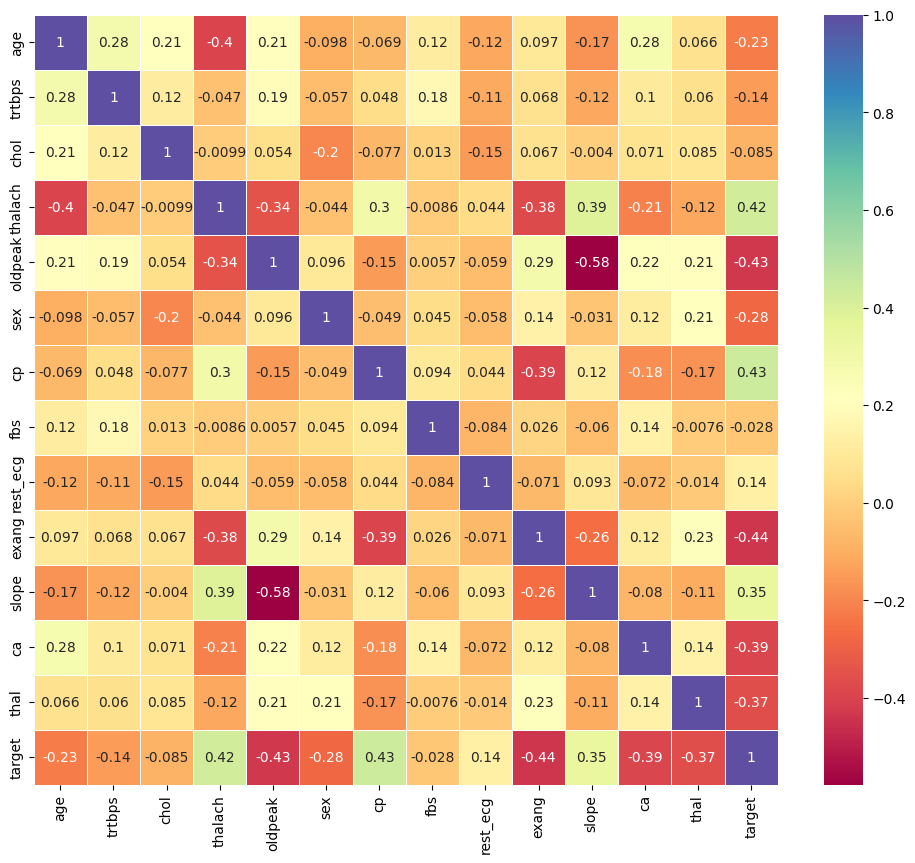

In [50]:
plt.figure(figsize = (12,10))
sns.heatmap(data = df_new2.corr(), cmap = "Spectral", annot = True, linewidths = 0.5)

Insights:

age
- Has considerable negative correlation with thalach.
- We can say that the maximum heart rate achieved decreases as age increases.



trtbps
- Not much correlation with most of the variables.
- Very low positive correlation with age.




chol
- There is a low positive correlation with age and a low negative correlation with sex.
- We can say that as age increases, cholesterol also increases.
- We can also say that men have slightly more cholesterol than women.



thalach
- There is a considerable positive correlation with the target variable (highest among all the other variables).
- We can say that the maximum heart rate achieved considerably influences the risk of a heart attack.
- There is also a considerable negative correlation with age, oldpeak and exang.



oldpeak
- High negative correlation with the slope variable.
- Considerable negative correlation with target as well as thalach.



sex
- Low negative correlation with the target variable.



cp
- Considerable correlation with thalach, exang and target.
- Out of the three, the target variable has the highest correlation; might be a direct triggerer of heart attack.


fbs
- Doesn't correlate well with the other variables.
- Highest correlation is with the trtbps variable which is a low positive correlation.



rest_ecg
- Doesn't correlate well with the other variables.
- Highest correlation is with the target variable which is a low positive correlation.



exang
- Considerably high negative correlation with the target variable.
- Also has considerable negative correlation with cp and thalach.



slope
- High negative correlation with the oldpeak variable.
- Considerable positive correlation with thalach and the target.



ca
- Considerably high negative correlation with the target variable.
- Low positive correlation with age.



thal
- Considerably high negative correlation with the target variable.
- Low positive correlation with oldpeak, sex and exang.



target
- Considerably high negative correlation with: oldpeak, exang, ca and thal
- Considerably high positive correlation with: thalach, cp and slope.
- Low negative correlation with: age and sex.
- Low positive correlation with: rest_ecg.

### 4. Preparing for Modeling

#### 4.1 Dropping Columns with Low Correlation

In [51]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2.0,1


In [52]:
df.drop(["chol", "fbs", "rest_ecg"], axis=1, inplace=True)

In [53]:
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,150,0,2.3,0,0,1.0,1
1,37,1,2,130,187,0,3.5,0,0,2.0,1
2,41,0,1,130,172,0,1.4,2,0,2.0,1
3,56,1,1,120,178,0,0.8,2,0,2.0,1
4,57,0,0,120,163,1,0.6,2,0,2.0,1


#### 4.2 Handling Outliers

##### 4.2.1 Visualizing outliers

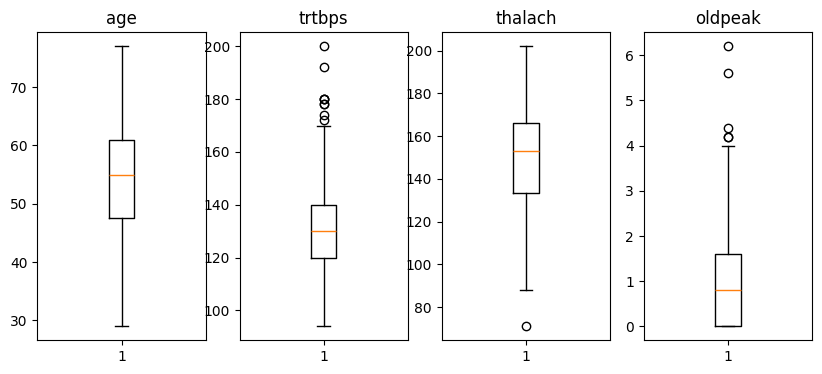

In [54]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (10, 4))

ax1.boxplot(df["age"])
ax1.set_title("age")

ax2.boxplot(df["trtbps"])
ax2.set_title("trtbps")

ax3.boxplot(df["thalach"])
ax3.set_title("thalach")

ax4.boxplot(df["oldpeak"])
ax4.set_title("oldpeak")

plt.show()

Observing the above plots, we can conclude the following:

age
-	Visibly no outliers.

trtbps
-	Since the box is almost in the middle of the two whiskers, we can say that the distribution is normal.
- However, there are a lot of outliers here.

thalach
-	The box is slightly shifted towards the max whisker; slight left skew in the distribution.
-	Only one outlier.

oldpeak
-	The box coincides with the min whisker; extremely right skewed distribution.
-	A bunch of outliers above the max whisker as well.


##### 4.2.2 Dealing with outliers

##### 4.2.2.1 trtbps

In [55]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

In [56]:
z_scores_trtbps = zscore(df["trtbps"])
for threshold in range(1, 4):
    print("Threshold Value: {}".format(threshold))
    print("Number of Outliers: {}".format(len(np.where(z_scores_trtbps > threshold)[0])))
    print("-------------------")

Threshold Value: 1
Number of Outliers: 51
-------------------
Threshold Value: 2
Number of Outliers: 13
-------------------
Threshold Value: 3
Number of Outliers: 2
-------------------


In [57]:
df[z_scores_trtbps > 2][["trtbps"]]

,trtbps
8,172
101,178
110,180
152,170
195,170
203,180
223,200
228,170
241,174
248,192


In [58]:
df[z_scores_trtbps > 2].trtbps.min()

170

In [59]:
df[df["trtbps"] < 170].trtbps.max()

165

In [60]:
winsorize_percentile_trtbps = (stats.percentileofscore(df["trtbps"], 165)) / 100
print(winsorize_percentile_trtbps)

0.957095709570957


In [61]:
1 - winsorize_percentile_trtbps

np.float64(0.04290429042904298)

In [62]:
trtbps_winsorize = winsorize(df.trtbps, (0, (1 - winsorize_percentile_trtbps)))

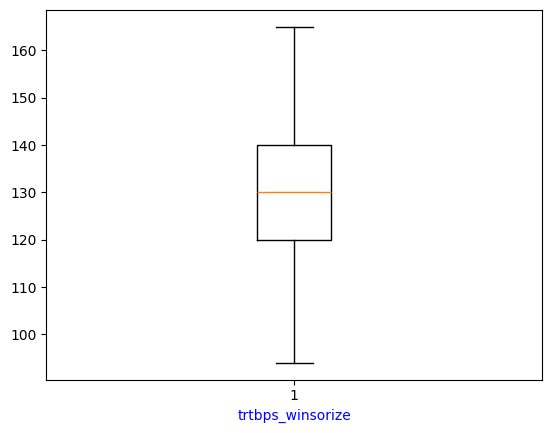

In [63]:
plt.boxplot(trtbps_winsorize)
plt.xlabel("trtbps_winsorize", color = "b")
plt.show()

In [64]:
df["trtbps_winsorize"] = trtbps_winsorize

In [65]:
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
0,63,1,3,145,150,0,2.3,0,0,1.0,1,145
1,37,1,2,130,187,0,3.5,0,0,2.0,1,130
2,41,0,1,130,172,0,1.4,2,0,2.0,1,130
3,56,1,1,120,178,0,0.8,2,0,2.0,1,120
4,57,0,0,120,163,1,0.6,2,0,2.0,1,120


##### 4.2.2.2 thalach

In [66]:
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]

In [67]:
thalach_out = iqr(df, "thalach")

In [68]:
thalach_out

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
272,67,1,0,120,71,0,1.0,1,0,2.0,0,120


In [69]:
df.drop([272], axis = 0, inplace = True)

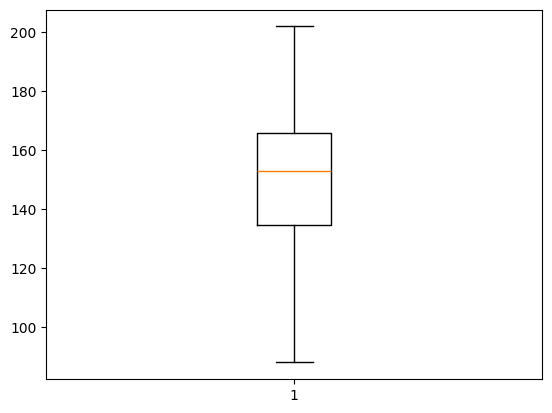

In [70]:
plt.boxplot(df["thalach"]);

##### 4.2.2.3 oldpeak

In [71]:
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]

In [72]:
iqr(df, "oldpeak")

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
101,59,1,3,178,145,0,4.2,0,0,3.0,1,165
204,62,0,0,160,145,0,6.2,0,3,3.0,0,160
221,55,1,0,140,111,1,5.6,0,0,3.0,0,140
250,51,1,0,140,122,1,4.2,1,3,3.0,0,140
291,58,1,0,114,140,0,4.4,0,3,1.0,0,114


In [73]:
df[df["oldpeak"] < 4.2].oldpeak.max()

4.0

In [74]:
winsorize_percentile_oldpeak = (stats.percentileofscore(df["oldpeak"], 4)) / 100
print(winsorize_percentile_oldpeak)

0.980132450331126


In [75]:
oldpeak_winsorize = winsorize(df.oldpeak, (0, (1 - winsorize_percentile_oldpeak)))

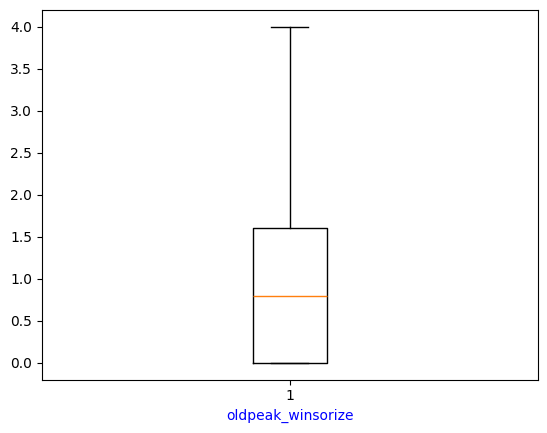

In [76]:
plt.boxplot(oldpeak_winsorize)
plt.xlabel("oldpeak_winsorize", color = "b")
plt.show()

In [77]:
df["oldpeak_winsorize"] = oldpeak_winsorize

In [78]:
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,145,150,0,2.3,0,0,1.0,1,145,2.3
1,37,1,2,130,187,0,3.5,0,0,2.0,1,130,3.5
2,41,0,1,130,172,0,1.4,2,0,2.0,1,130,1.4
3,56,1,1,120,178,0,0.8,2,0,2.0,1,120,0.8
4,57,0,0,120,163,1,0.6,2,0,2.0,1,120,0.6


In [79]:
df.drop(["trtbps", "oldpeak"], axis = 1, inplace = True)

In [80]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,150,0,0,0,1.0,1,145,2.3
1,37,1,2,187,0,0,0,2.0,1,130,3.5
2,41,0,1,172,0,2,0,2.0,1,130,1.4
3,56,1,1,178,0,2,0,2.0,1,120,0.8
4,57,0,0,163,1,2,0,2.0,1,120,0.6


#### 4.3 Determining the Distributions of Numerical Variables

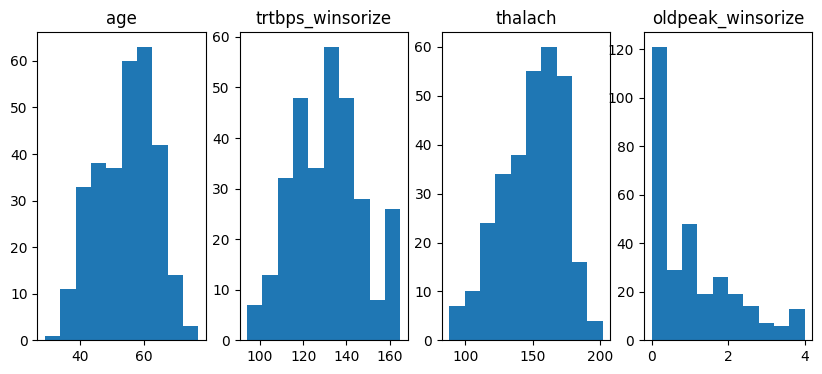

In [81]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (10, 4))

ax1.hist(df["age"])
ax1.set_title("age")

ax2.hist(df["trtbps_winsorize"])
ax2.set_title("trtbps_winsorize")

ax3.hist(df["thalach"])
ax3.set_title("thalach")

ax4.hist(df["oldpeak_winsorize"])
ax4.set_title("oldpeak_winsorize")

plt.show()

In [82]:
df[["age", "trtbps_winsorize", "thalach", "oldpeak_winsorize"]].agg(["skew"]).transpose()

,skew
age,-0.199209
trtbps_winsorize,0.251969
thalach,-0.461611
oldpeak_winsorize,0.996036


The oldpeak variable (after winsorizing) was found to have an asymmetrical distribution. It was found to be right-skewed (positively skewed). Taking the log and square root of data can help make the distribution more symmetrical.

##### 4.3.1 Transforming Asymmetrical Data

In [83]:
df["oldpeak_winsorize_log"] = np.log(df["oldpeak_winsorize"])
df["oldpeak_winsorize_sqrt"] = np.sqrt(df["oldpeak_winsorize"])

In [84]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize,oldpeak_winsorize_log,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1.0,1,145,2.3,0.832909,1.516575
1,37,1,2,187,0,0,0,2.0,1,130,3.5,1.252763,1.870829
2,41,0,1,172,0,2,0,2.0,1,130,1.4,0.336472,1.183216
3,56,1,1,178,0,2,0,2.0,1,120,0.8,-0.223144,0.894427
4,57,0,0,163,1,2,0,2.0,1,120,0.6,-0.510826,0.774597


In [85]:
df[["oldpeak_winsorize", "oldpeak_winsorize_log", "oldpeak_winsorize_sqrt"]].agg(["skew"]).transpose()

,skew
oldpeak_winsorize,0.996036
oldpeak_winsorize_log,NaN
oldpeak_winsorize_sqrt,0.108926


In [86]:
df.drop(["oldpeak_winsorize", "oldpeak_winsorize_log"], axis = 1, inplace = True)

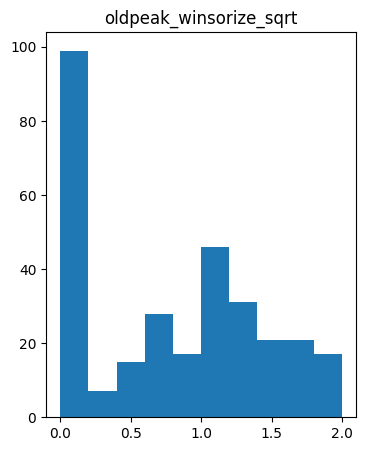

In [87]:
fig, ax1 = plt.subplots(1, 1, figsize = (4, 5))

ax1.hist(df["oldpeak_winsorize_sqrt"])
ax1.set_title("oldpeak_winsorize_sqrt")

plt.show()

#### 4.4 Applying One Hot Encoding Method to Categorical Variables

In [88]:
df_copy = df.copy()

In [89]:
df_copy.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1.0,1,145,1.516575
1,37,1,2,187,0,0,0,2.0,1,130,1.870829
2,41,0,1,172,0,2,0,2.0,1,130,1.183216
3,56,1,1,178,0,2,0,2.0,1,120,0.894427
4,57,0,0,163,1,2,0,2.0,1,120,0.774597


In [90]:
categorical_vars

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [91]:
categorical_vars.remove("fbs")
categorical_vars.remove("rest_ecg")

In [92]:
df_copy = pd.get_dummies(df_copy, columns = categorical_vars[:-1], drop_first = True) #One hot encoding

In [93]:
df_copy.head()

,age,thalach,target,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2.0,thal_3.0
0,63,150,1,145,1.516575,True,False,False,True,False,False,False,False,False,False,False,False,False
1,37,187,1,130,1.870829,True,False,True,False,False,False,False,False,False,False,False,True,False
2,41,172,1,130,1.183216,False,True,False,False,False,False,True,False,False,False,False,True,False
3,56,178,1,120,0.894427,True,True,False,False,False,False,True,False,False,False,False,True,False
4,57,163,1,120,0.774597,False,False,False,False,True,False,True,False,False,False,False,True,False


#### 4.5 Feature Scaling with the RobustScaler

In [94]:
numerical_vars2 = ["age", "thalach", "trtbps_winsorize", "oldpeak_winsorize_sqrt"]

In [95]:
robus_scaler = RobustScaler()

In [96]:
df_copy[numerical_vars2] = robust_scaler.fit_transform(df_copy[numerical_vars2])

In [97]:
df_copy.head()

,age,thalach,target,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2.0,thal_3.0
0,0.581818,-0.095238,1,0.75,0.491851,True,False,False,True,False,False,False,False,False,False,False,False,False
1,-1.309091,1.079365,1,0.00,0.771913,True,False,True,False,False,False,False,False,False,False,False,True,False
2,-1.018182,0.603175,1,0.00,0.228308,False,True,False,False,False,False,True,False,False,False,False,True,False
3,0.072727,0.793651,1,-0.50,0.000000,True,True,False,False,False,False,True,False,False,False,False,True,False
4,0.145455,0.317460,1,-0.50,-0.094734,False,False,False,False,True,False,True,False,False,False,False,True,False


#### 4.6 Splitting Dataset into Train and Test Set

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X = df_copy.drop(["target"], axis = 1)
y = df_copy[["target"]]

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)

In [101]:
X_train.head()

,age,thalach,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2.0,thal_3.0
201,0.363636,-0.380952,-0.25,0.615769,True,False,False,False,True,True,False,True,False,False,False,False,True
82,0.363636,0.222222,-1.40,-0.707107,False,False,True,False,False,False,True,True,False,False,False,True,False
187,-0.072727,-1.396825,-0.30,0.465497,True,False,False,False,True,True,False,True,False,False,False,False,True
259,-1.236364,0.920635,-0.50,0.833997,True,False,False,True,True,True,False,False,False,False,False,False,True
5,0.145455,-0.158730,0.50,-0.207107,True,False,False,False,False,True,False,False,False,False,False,False,False


In [102]:
y_train.head()

,target
201,0
82,1
187,0
259,0
5,1


In [103]:
print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")
print(f"y_train: {y_train.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

X_train: 271
X_test: 31
y_train: 271
y_test: 31


### 5. Modeling

#### 5.1 Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [105]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [106]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [107]:
y_pred_logreg = log_reg.predict(X_test)

In [108]:
y_pred_logreg

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1])

In [109]:
accuracy = accuracy_score(y_test, y_pred_logreg)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.8709677419354839


In [110]:
from sklearn.model_selection import cross_val_score

In [111]:
scores = cross_val_score(log_reg, X_test, y_test, cv = 10)
print("CV Score: {:.2f}%".format(scores.mean()*100))

CV Score: 86.67%


Hyperparameter Optimization (with GridSearchCV)

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
log_reg_new = LogisticRegression()
log_reg_new

LogisticRegression()

In [114]:
parameters = {"penalty":["l1","l2"], "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [115]:
log_reg_grid = GridSearchCV(log_reg_new, param_grid = parameters)

In [116]:
log_reg_grid.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [117]:
print("Best Parameters: ", log_reg_grid.best_params_)

Best Parameters:  {'penalty': 'l1', 'solver': 'saga'}


In [118]:
log_reg_new2 = LogisticRegression(penalty = "l1", solver = "saga")
log_reg_new2

LogisticRegression(penalty='l1', solver='saga')

In [119]:
log_reg_new2.fit(X_train, y_train)
y_pred_logreg = log_reg_new2.predict(X_test)

##### 5.1.1 Metrics

In [120]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_logreg)*100))

Accuracy: 87.10%


In [121]:
scores = cross_val_score(log_reg_new2, X_test, y_test, cv = 10)
print("CV Score: {:.2f}%".format(scores.mean()*100))

CV Score: 76.67%


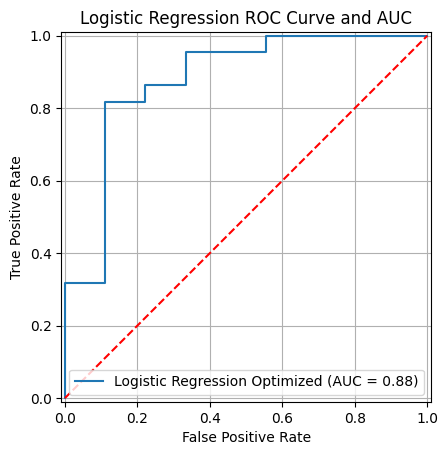

In [122]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(log_reg_new2, X_test, y_test, name="Logistic Regression Optimized")

plt.plot([0, 1], [0, 1], "r--")
plt.title("Logistic Regression ROC Curve and AUC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.show()

In [123]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [124]:
print("Precision: {:.2f}%".format(precision_score(y_test, y_pred_logreg) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred_logreg) * 100))
print("F1-Score: {:.2f}%".format(f1_score(y_test, y_pred_logreg) * 100))

Precision: 87.50%
Recall: 95.45%
F1-Score: 91.30%


#### 5.2 Decision Tree

In [125]:
from sklearn.tree import DecisionTreeClassifier

In [126]:
dec_tree = DecisionTreeClassifier(random_state = 5)

In [127]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [128]:
y_pred_dt = dec_tree.predict(X_test)

##### 5.2.1 Metrics

In [129]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_dt)*100))

Accuracy: 74.19%


In [130]:
scores = cross_val_score(dec_tree, X_test, y_test, cv = 10)
print("CV Score: {:.2f}%".format(scores.mean()*100))

CV Score: 83.33%


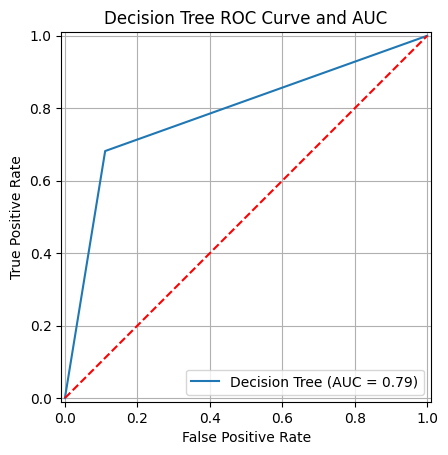

In [131]:
RocCurveDisplay.from_estimator(dec_tree, X_test, y_test, name="Decision Tree")

plt.plot([0, 1], [0, 1], "r--")
plt.title("Decision Tree ROC Curve and AUC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.show()

In [132]:
print("Precision: {:.2f}%".format(precision_score(y_test, y_pred_dt) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred_dt) * 100))
print("F1-Score: {:.2f}%".format(f1_score(y_test, y_pred_dt) * 100))

Precision: 93.75%
Recall: 68.18%
F1-Score: 78.95%


#### 5.3 Random Forest

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
random_forest = RandomForestClassifier(random_state = 5)

In [135]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [136]:
y_pred_rf = random_forest.predict(X_test)

In [137]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Accuracy: 0.8387096774193549


In [138]:
scores = cross_val_score(random_forest, X_test, y_test, cv = 10)
print("CV Score:", scores.mean())

CV Score: 0.8999999999999998


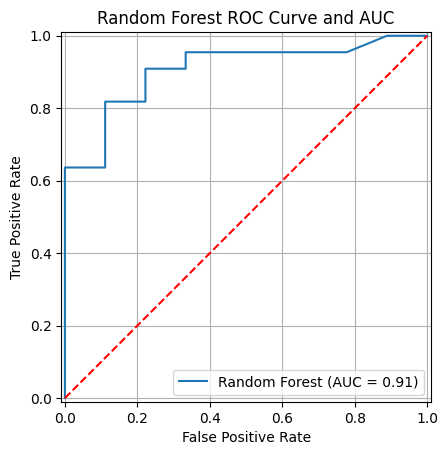

In [139]:
RocCurveDisplay.from_estimator(random_forest, X_test, y_test, name="Random Forest")

plt.plot([0, 1], [0, 1], "r--")
plt.title("Random Forest ROC Curve and AUC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.show()

Hyperparameter Optimization

In [140]:
random_forest_new = RandomForestClassifier(random_state = 5)
random_forest_new

RandomForestClassifier(random_state=5)

In [141]:
parameters = {"n_estimators" : [50, 100, 150, 200],
              "criterion" : ["gini", "entropy"],
              'max_features': ['auto', 'sqrt', 'log2'],
              'bootstrap': [True, False]}

In [142]:
random_forest_grid = GridSearchCV(random_forest_new, param_grid = parameters)

In [143]:
random_forest_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=5),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [144]:
print("Best Parameters:", random_forest_grid.best_params_)

Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 150}


In [145]:
random_forest_new2 = RandomForestClassifier(bootstrap = True, criterion = "entropy", max_features="sqrt", n_estimators = 200, random_state = 5)

In [146]:
random_forest_new2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=5)

In [147]:
y_pred_rf = random_forest_new2.predict(X_test)

##### 5.3.1 Metrics

In [148]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_rf)*100))

Accuracy: 90.32%


In [149]:
scores = cross_val_score(random_forest_new2, X_test, y_test, cv = 10)
print("CV score: {:.2f}%".format(scores.mean()*100))

CV score: 90.00%


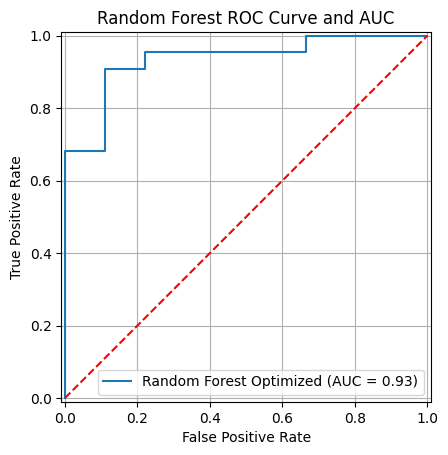

In [150]:
RocCurveDisplay.from_estimator(random_forest_new2, X_test, y_test, name="Random Forest Optimized")

plt.plot([0, 1], [0, 1], "r--")
plt.title("Random Forest ROC Curve and AUC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.show()

In [151]:
print("Precision: {:.2f}%".format(precision_score(y_test, y_pred_rf) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred_rf) * 100))
print("F1-Score: {:.2f}%".format(f1_score(y_test, y_pred_rf) * 100))

Precision: 95.24%
Recall: 90.91%
F1-Score: 93.02%


#### 5.4 Support Vector Machine

In [152]:
from sklearn.svm import SVC

In [153]:
svc_model = SVC(random_state = 5)

In [154]:
svc_model.fit(X_train, y_train)

SVC(random_state=5)

In [155]:
y_pred_svm = svc_model.predict(X_test)

##### 5.4.1 Metrics

In [156]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_svm)*100))

Accuracy: 87.10%


In [157]:
scores = cross_val_score(svc_model, X_test, y_test, cv = 10)
print("CV score: {:.2f}%".format(scores.mean()*100))

CV score: 83.33%


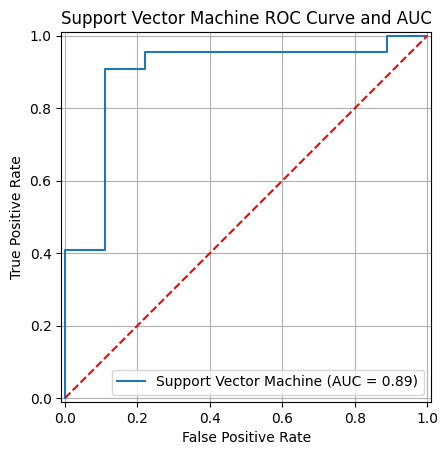

In [158]:
RocCurveDisplay.from_estimator(svc_model, X_test, y_test, name="Support Vector Machine")

plt.plot([0, 1], [0, 1], "r--")
plt.title("Support Vector Machine ROC Curve and AUC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.show()

In [159]:
print("Precision: {:.2f}%".format(precision_score(y_test, y_pred_svm) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred_svm) * 100))
print("F1-Score: {:.2f}%".format(f1_score(y_test, y_pred_svm) * 100))

Precision: 90.91%
Recall: 90.91%
F1-Score: 90.91%


#### 5.5 XGBoost

In [160]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()

In [161]:
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [162]:
y_pred_xg = xgbc.predict(X_test)

In [163]:
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

In [164]:
xgb_grid = GridSearchCV(xgbc, param_grid = xgb_params)
xgb_grid.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]})

In [165]:
print("Best Parameters: ", xgb_grid.best_params_)

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [166]:
xgbc2 = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8)

In [167]:
xgbc2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [168]:
y_pred_xg = xgbc2.predict(X_test)

##### 5.5.1 Metrics

In [169]:
print("Accuracy {:.2f}%".format(accuracy_score(y_test, y_pred_xg)*100))

Accuracy 77.42%


In [170]:
scores = cross_val_score(xgbc2, X_test, y_test, cv = 10)
print("CV score: {:.2f}%".format(scores.mean()*100))

CV score: 76.67%


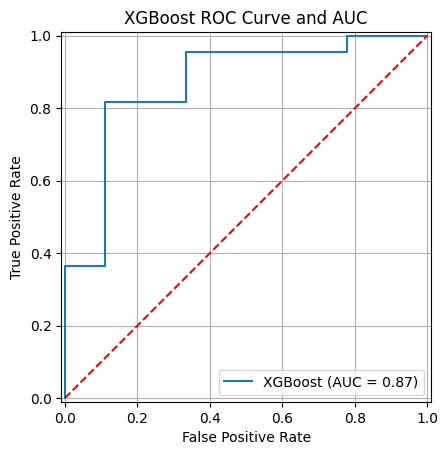

In [171]:
RocCurveDisplay.from_estimator(xgbc2, X_test, y_test, name="XGBoost")

plt.plot([0, 1], [0, 1], "r--")
plt.title("XGBoost ROC Curve and AUC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.show()

In [172]:
print("Precision: {:.2f}%".format(precision_score(y_test, y_pred_xg) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred_xg) * 100))
print("F1-Score: {:.2f}%".format(f1_score(y_test, y_pred_xg) * 100))

Precision: 85.71%
Recall: 81.82%
F1-Score: 83.72%


#### 5.6 CatBoost

In [173]:
pip install catboost

In [174]:
from catboost import CatBoostClassifier

In [175]:
cbc = CatBoostClassifier(verbose=0)

In [176]:
cbc.fit(X_train, y_train)

In [177]:
y_pred_cbc = cbc.predict(X_test)

##### 5.6.1 Metrics

In [178]:
print("Accuracy {:.2f}%".format(accuracy_score(y_test, y_pred_cbc)*100))

Accuracy 87.10%


In [179]:
scores = cross_val_score(cbc, X_test, y_test, cv = 10)
print("CV score: {:.2f}%".format(scores.mean()*100))

CV score: 90.00%


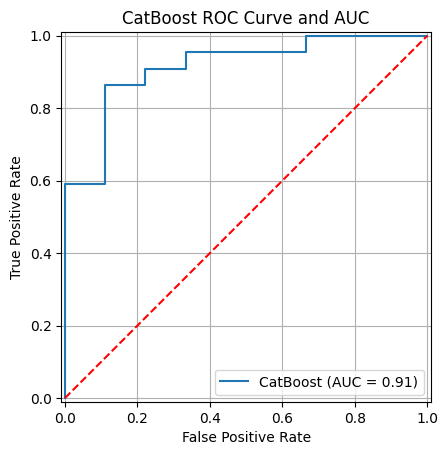

In [180]:
RocCurveDisplay.from_estimator(cbc, X_test, y_test, name="CatBoost")

plt.plot([0, 1], [0, 1], "r--")
plt.title("CatBoost ROC Curve and AUC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.show()

In [181]:
print("Precision: {:.2f}%".format(precision_score(y_test, y_pred_cbc) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred_cbc) * 100))
print("F1-Score: {:.2f}%".format(f1_score(y_test, y_pred_cbc) * 100))

Precision: 95.00%
Recall: 86.36%
F1-Score: 90.48%


#### 5.7 LightGBM

In [182]:
from lightgbm import LGBMClassifier

In [183]:
lgbm = LGBMClassifier(verbose=-1)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

##### 5.7.1 Metrics

In [184]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_lgbm)*100))

Accuracy: 77.42%


In [185]:
scores = cross_val_score(lgbm, X_test, y_test, cv = 10)
print("CV score: {:.2f}%".format(scores.mean()*100))

CV score: 70.83%


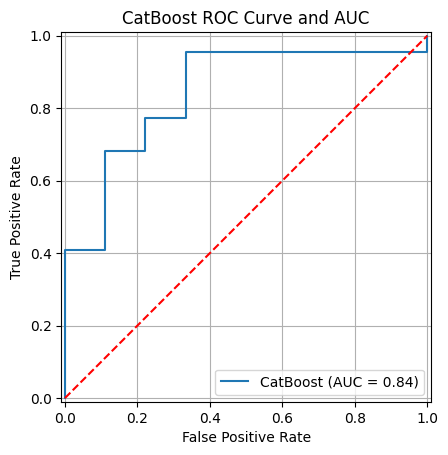

In [186]:
RocCurveDisplay.from_estimator(lgbm, X_test, y_test, name="CatBoost")

plt.plot([0, 1], [0, 1], "r--")
plt.title("CatBoost ROC Curve and AUC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.show()

In [187]:
print("Precision: {:.2f}%".format(precision_score(y_test, y_pred_lgbm) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred_lgbm) * 100))
print("F1-Score: {:.2f}%".format(f1_score(y_test, y_pred_lgbm) * 100))

Precision: 89.47%
Recall: 77.27%
F1-Score: 82.93%
